In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1630


<Axes: xlabel='Time'>

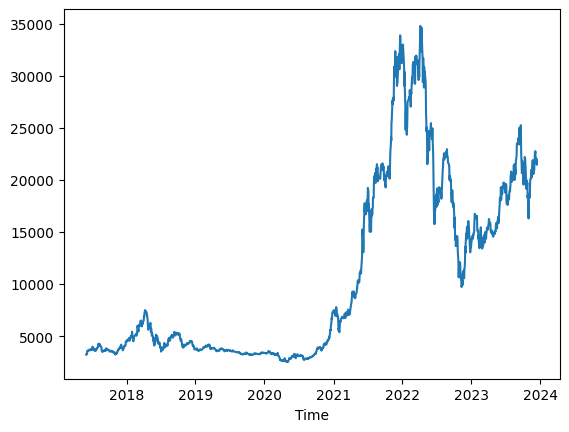

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
VND['Lag'] = np.arange(len(VND.index))
VND = VND[['Close', 'Lag']]
VND

VND = pd.DataFrame(VND)
VND.set_index("Lag", inplace= True)
VND

,Close
Lag,
0,3230
1,3280
2,3280
3,3320
4,3590
...,...
1625,21950
1626,22050
1627,21600


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.7 * len(VND))
test_size = int(0.3 * len(VND))

train_data = VND[:train_size]
test_data = VND[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[13403.94505282],
       [13415.73267621],
       [13427.5202996 ],
       [13439.307923  ],
       [13451.09554639],
       [13462.88316979],
       [13474.67079318],
       [13486.45841658],
       [13498.24603997],
       [13510.03366337],
       [13521.82128676],
       [13533.60891015],
       [13545.39653355],
       [13557.18415694],
       [13568.97178034],
       [13580.75940373],
       [13592.54702713],
       [13604.33465052],
       [13616.12227391],
       [13627.90989731],
       [13639.6975207 ],
       [13651.4851441 ],
       [13663.27276749],
       [13675.06039089],
       [13686.84801428],
       [13698.63563767],
       [13710.42326107],
       [13722.21088446],
       [13733.99850786],
       [13745.78613125],
       [13757.57375465],
       [13769.36137804],
       [13781.14900143],
       [13792.93662483],
       [13804.72424822],
       [13816.51187162],
       [13828.29949501],
       [13840.08711841],
       [13851.8747418 ],
       [13863.66236519],


In [7]:
# 6. 60 days prediction
last_index =  VND.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[19168.09289264]
 [19179.88051604]
 [19191.66813943]
 [19203.45576283]
 [19215.24338622]
 [19227.03100961]
 [19238.81863301]
 [19250.6062564 ]
 [19262.3938798 ]
 [19274.18150319]
 [19285.96912659]
 [19297.75674998]
 [19309.54437338]
 [19321.33199677]
 [19333.11962016]
 [19344.90724356]
 [19356.69486695]
 [19368.48249035]
 [19380.27011374]
 [19392.05773714]
 [19403.84536053]
 [19415.63298392]
 [19427.42060732]
 [19439.20823071]
 [19450.99585411]
 [19462.7834775 ]
 [19474.5711009 ]
 [19486.35872429]
 [19498.14634768]
 [19509.93397108]
 [19521.72159447]
 [19533.50921787]
 [19545.29684126]
 [19557.08446466]
 [19568.87208805]
 [19580.65971144]
 [19592.44733484]
 [19604.23495823]
 [19616.02258163]
 [19627.81020502]
 [19639.59782842]
 [19651.38545181]
 [19663.17307521]
 [19674.9606986 ]
 [19686.74832199]
 [19698.53594539]
 [19710.32356878]
 [19722.11119218]
 [19733.89881557]
 [19745.68643897]
 [19757.47406236]
 [19769.26168575]
 [19781.04930915]

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))


Testing RMSE: 7554.296262332132
Testing MAPE: 23.288503916854953
Testing MAE: 5292.054470673506
MSLR:  0.14106287708474935


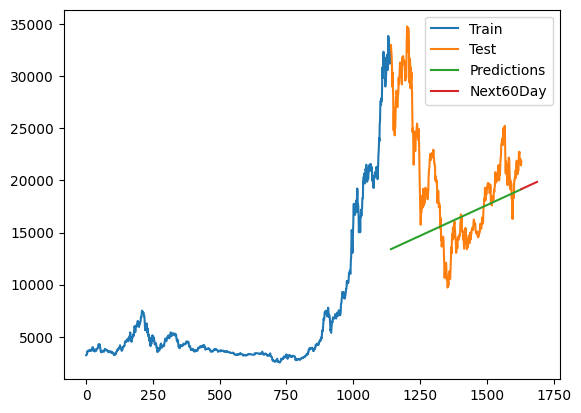

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()